## **BI-LSTM + Word Embedding**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## 1. Persiapan Dataset

In [44]:
import pandas as pd

# Path ke file dataset
train_dataset_path = '..\Dataset\Training\Clean_train_data_full.csv'

# Membaca dataset
train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)
train_df.columns = ['tweet', 'label']

# Tampilkan 10 baris pertama dataset
print(train_df.head(10))


                                               tweet  label
0           ['pagi', 'sudah', 'di', 'buat', 'emosi']  Anger
1  ['kok', 'stabilitas', 'negara', 'memange', 'ta...  Anger
2  ['sudah', 'lah', 'emosi', 'terus', 'liat', 'em...  Anger
3  ['aib', 'bodoh', 'benar', 'sebelum', 'kata', '...  Anger
4    ['dih', 'kamu', 'yang', 'menyebalkan', 'bodoh']  Anger
5  ['asli', 'malu', 'maluin', 'orang', 'indo', 't...  Anger
6                          ['drama', 'abg', 'tolol']  Anger
7  ['masih', 'emosi', 'sih', 'sama', 'katla', 'ke...  Anger
8  ['bangsat', 'tribute', 'no', 'bencana', 'no', ...  Anger
9  ['ingin', 'pergi', 'jauh', 'terus', 'teriak', ...  Anger


## 2. Preprocessing Data

In [45]:
import ast

# Mengubah label menjadi indeks numerik
def get_label_idx(label):
    if label == 'Anger':
        return 0
    if label == 'Joy':
        return 1
    if label == 'Fear':
        return 2
    if label == "Love":
        return 3
    if label == "Sad":
        return 4
    if label == "Neutral":
        return 5

train_df['label'] = train_df['label'].apply(get_label_idx)

# Fungsi untuk menggabungkan teks yang telah diproses
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

train_df["preprocessed"] = train_df["tweet"].apply(join_text_list)
print(train_df["preprocessed"].head())


0                             pagi sudah di buat emosi
1    kok stabilitas negara memange tahun negara tid...
2                      sudah lah emosi terus liat emyu
3    aib bodoh benar sebelum kata aib itu muncul te...
4                      dih kamu yang menyebalkan bodoh
Name: preprocessed, dtype: object


## 3. Tokenisasi

In [46]:
import numpy as np
import tensorflow as tf

vocab_size = 5000
embedding_dim = 16
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

# Membuat embedding_matrix contoh
embedding_matrix = np.random.rand(vocab_size, embedding_dim)


## 4. Word Embedding

Padding

In [47]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan dan data validasi
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate word index dictionary untuk kalimat-kalimat pelatihan
tokenizer.fit_on_texts(train_df['preprocessed'])
word_index = tokenizer.word_index
print(word_index)

# Convert kalimat-kalimat pelatihan menjadi urutan kata
train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert kalimat-kalimat validasi menjadi urutan kata
valid_sequences = tokenizer.texts_to_sequences(valid_df['preprocessed'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)



{'<OOV>': 1, 'saya': 2, 'tidak': 3, 'yang': 4, 'sekali': 5, 'suka': 6, 'saja': 7, 'kalau': 8, 'dan': 9, 'sudah': 10, 'tapi': 11, 'sama': 12, 'ini': 13, 'kamu': 14, 'di': 15, 'ya': 16, 'sedih': 17, 'ada': 18, 'itu': 19, 'orang': 20, 'jadi': 21, 'dia': 22, 'bisa': 23, 'lagi': 24, 'juga': 25, 'sangat': 26, 'semangat': 27, 'karena': 28, 'mau': 29, 'takut': 30, 'apa': 31, 'terus': 32, 'dari': 33, 'jangan': 34, 'begitu': 35, 'nya': 36, 'buat': 37, 'ke': 38, 'enak': 39, 'pagi': 40, 'tahu': 41, 'biasa': 42, 'marah': 43, 'sih': 44, 'dengan': 45, 'masih': 46, 'banyak': 47, 'baik': 48, 'hari': 49, 'kita': 50, 'bodoh': 51, 'untuk': 52, 'memang': 53, 'mereka': 54, 'kan': 55, 'lebih': 56, 'sampai': 57, 'bikin': 58, 'bahagia': 59, 'dulu': 60, 'tuh': 61, 'benar': 62, 'kabar': 63, 'si': 64, 'malu': 65, 'anak': 66, 'sayang': 67, 'pakai': 68, 'kok': 69, 'semua': 70, 'selalu': 71, 'kenapa': 72, 'kasih': 73, 'sepi': 74, 'cinta': 75, 'baru': 76, 'pas': 77, 'semoga': 78, 'sendiri': 79, 'atau': 80, 'cuma': 81

Memuat Word Embedding

In [48]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in train_df['preprocessed']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=5, workers=4)

Membuat Matriks

In [49]:
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

Membuat Matriks Embedding

In [50]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[1000])
print(word)

('kesayangan', array([-0.15571243, -0.26639223,  0.40218118,  0.28553215,  0.49835488,
       -0.06143895,  0.59286553,  0.05600887]))


## 5. Build and Compile Model

Referensi : rehan

In [56]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Misalkan vocab_size, embedding_dim, dan max_length sudah didefinisikan sebelumnya
vocab_size = 20000  # Contoh ukuran kosakata
embedding_dim = 8  # Dimensi embedding seperti pada gambar
max_length = 100  # Panjang input seperti pada gambar

# Jumlah kelas output (6 kelas: Neutral, Joy, Fear, Love, Sad, Anger)
num_classes = 6

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Menggunakan softmax untuk multi-kelas
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Membuat contoh input untuk membangun model
import numpy as np
dummy_input = np.zeros((1, max_length))

# Memaksa model untuk membangun arsitektur dengan melewatkan contoh input
model.predict(dummy_input)

print(model.summary())


c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (1, 100, 8)            │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (1, 96, 128)           │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (1, 48, 128)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (1, 6144)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (1, 16)                │        98,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (1, 16)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (1, 6)                 │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,670 (1.01 MB)

 Trainable params: 263,670 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

None


## 6. Pelatihan Model

In [52]:
num_epochs = 20

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=1)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2519 - loss: 1.7551 - val_accuracy: 0.2747 - val_loss: 1.6842
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3008 - loss: 1.6252 - val_accuracy: 0.3814 - val_loss: 1.5116
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3844 - loss: 1.4255 - val_accuracy: 0.4887 - val_loss: 1.3635
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4600 - loss: 1.2999 - val_accuracy: 0.5657 - val_loss: 1.3138
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5341 - loss: 1.1797 - val_accuracy: 0.5770 - val_loss: 1.2969
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5619 - loss: 1.1019 - val_accuracy: 0.5890 - val_loss: 1.2727
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5909 - loss: 1.0059 - val_accuracy: 0.5699 - val_loss: 1.3326
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6227 - loss: 0.9259 - val_accuracy: 0.

## 7. Evaluasi Model

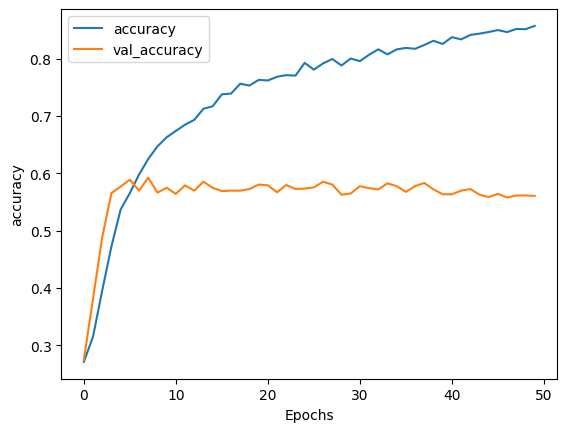

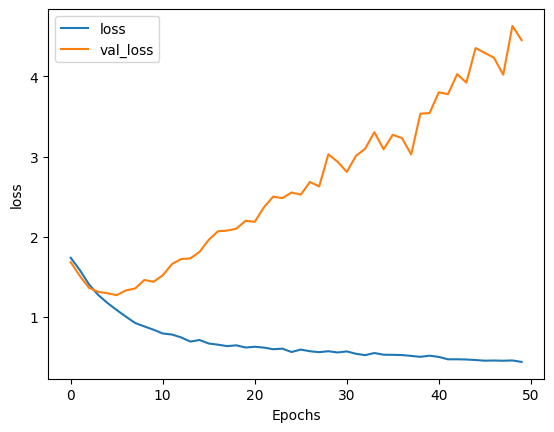

In [53]:
import matplotlib.pyplot as plt

# Fungsi untuk plot grafik training history
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot grafik akurasi dan loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



In [54]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1416,)
(1416, 6)
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       233
           1       0.64      0.59      0.62       253
           2       0.72      0.62      0.67       195
           3       0.57      0.54      0.55       153
           4       0.60      0.53      0.56       193
           5       0.50      0.60      0.54       389

    accuracy                           0.56      1416
   macro avg       0.58      0.56      0.57      1416
weighted avg       0.57      0.56      0.56      1416



## 7. Testing

In [57]:
## Testing
sample_text = ["Perasaan hangat yang membuat setiap hari terasa indah, memberikan kekuatan dalam kebersamaan dan membuat kita tersenyum tanpa alasan. Kebahagiaan yang datang dari hati dan memberikan makna dalam setiap momen bersama. Ada keajaiban dalam setiap tatapan dan sentuhan yang membuat dunia lebih cerah."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
print(model.predict(sample_padded))

## Prediksi label
def get_label(predict):
    if predict == 5:
        return 'anger'
    if predict == 4:
        return 'sad'
    if predict == 3:
        return 'love'
    if predict == 2:
        return 'fear'
    if predict == 1:
        return 'joy'
    if predict == 0:
        return 'neutral'
    
    
print(get_label(np.argmax(model.predict(sample_padded))))    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0.16671476 0.16679648 0.16414602 0.16550583 0.1678508  0.16898608]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
anger
